# Who will Medal in the Olympics?
Project and final report created by Brad Gauvin 17 Aug 2022

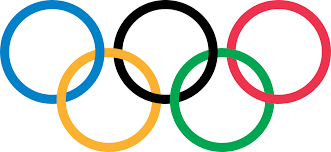

### Project Description

The purpose of this project was to identify which Olympians would medal in the olympics based on information derived from the olympics.com data. 


#### CodeUp Students:

Audience is a team of Data scientist students

#### Project Goal

86% of athletes don't medal in the past 120 years of the olympics.  The goal of this project is to find a more accurate way of identifying who will medal.  

## Executive Summary

#### Acquire and Prep
- I cleaned acquired data from a kaggle webpage.  Multiple CSV files were combined into one dataframe with key information included.  Data was cleaned by dropping unecessary columns, adjusting data formats, and accounting for any data that may lost (Year of olympics, when winner is identified).  All null values were addressed.

#### EDA
- Exploratory data analysis focused on four main questions.
    1. Is being home (host nation) increase chances of medaling?
    2. Does being on a team sport increase chances of medaling? 
    3. Does overall age impact medaling?
    4. Does bmi impact medaling?

 - EDA showed statistical significance for all questions.
 - Those four elements were used as features to model on. 
 
 #### Modeling
 Modeling used 4 models, with the KNN doing the best.  Ultimately, the Model met baseline.

#### To run this notebook you will need the following:
- need to download '!pip install opendatasets'
- Acquire, Modeling, Utilities, and Wrangel_o files in .py format from the repo
- Need Kaggle api token or you will be asked for kaggle login information
    - 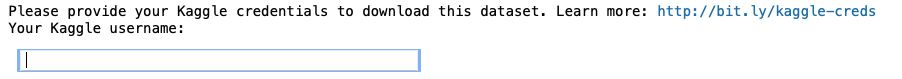
- For information on kaggle api visit this [link](https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/ "how to download kaggle dataset using jupyter notebook")

# Environment Set up

In [1]:
import pandas as pd
import numpy as np
import opendatasets as od
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import datetime

#Local Libraries
import wrangle_o
import utilities
import modeling

np.random.seed(123)

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
# Pull data From Kaggle Website
wrangle_o.pull_data()

Olympic data pulled


In [3]:
# To fill na, adjust "born" column to approriate date formats
wrangle_o.athlete_bio()

In [4]:
# Pulls in all spreadsheets for reference
bio = pd.read_csv('clean_olympic_athlete_bio.csv',keep_default_na=False)
er = pd.read_csv('Olympic_Athlete_Event_Results.csv')
res = pd.read_csv('Olympic_Results.csv')
country = pd.read_csv('Olympics_country.csv')
games = pd.read_csv('Olympics_Games.csv')
mt = pd.read_csv('Olympic_Games_Medal_Tally.csv')

In [5]:
# Merges data into one spreadsheet
olympics = wrangle_o.merge_data(bio, er, res, country, games)

Use df: 'olympics'


In [6]:
# Wrangles data to change formats, dtypes, drop unnecessary values.
olympics = wrangle_o.wrangle_olympics(olympics)

In [7]:
# Long code of replacing weight measurements and birth data- Takes a bit of time
olympics = wrangle_o.replace_olympics(olympics)

In [8]:
# Adds BMI and age, drops columns this information derives from
wrangle_o.height_weight_age_data(olympics)
olympics = olympics.drop(['born','year_born'], axis=1)
olympics

,athlete_id,name,sex,height,weight,country,country_noc_x,edition,sport,event,result_id,medal,isTeamSport,city,country_noc_y,event_year,medalist,home,age,bmi
0,14503,scar Giraldo,Male,175.37,70.62,Colombia,COL,Summer Olympics,Cycling Road,"Road Race, Individual, Men",154878,participant,0,Atlanta,USA,1996-01-01,0,0,22.00,22.96
1,58758,Hossein Mollaghasemi,Male,173.00,63.00,Islamic Republic of Iran,IRI,Summer Olympics,Wrestling,"Featherweight, Greco-Roman, Men",124658,participant,0,Roma,ITA,1960-01-01,0,0,26.00,21.05
2,58758,Hossein Mollaghasemi,Male,173.00,63.00,Islamic Republic of Iran,IRI,Summer Olympics,Wrestling,"Lightweight, Greco-Roman, Men",125396,participant,0,Tokyo,JPN,1964-01-01,0,0,30.00,21.05
3,90217,Enrico Lazzarotto,Male,178.00,72.00,Italy,ITA,Summer Olympics,Canoe Slalom,"Kayak Singles, Slalom, Men",256271,participant,0,Sydney,AUS,2000-01-01,0,0,26.00,22.72
4,74565,John Hou,Male,178.00,60.00,Papua New Guinea,PNG,Summer Olympics,Athletics,"100 metres, Men",63261,participant,0,Seoul,KOR,1988-01-01,0,0,20.00,18.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314720,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Horse Vault, Men",70306,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53
314721,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Parallel Bars, Men",70309,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53
314722,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Horizontal Bar, Men",70312,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53
314723,30727,Armando Valles,Male,170.00,68.00,Mexico,MEX,Summer Olympics,Artistic Gymnastics,"Rings, Men",70315,participant,0,Ciudad de México,MEX,1968-01-01,0,1,26.00,23.53


## Acquire and Prep Takeaways
1. Some Athletes born date had to be filled based on estimated dates
2. Athlete heights had to be adjusted, nulls filled with Average
3. Weights were in multiple formats (weight, weight class, multiple weight points).
    a. Had to build long replace function to find and replace format issues
    b. Nulls were filled with average weights
    
- See full EDA in repository for all cleaning actions taken

#### Outliers
 - Outliers were considered, but ultimately none were pulled from dataset.  
 - This was due to outliers being a key point for medaling in analysis.

### Split Data

In [9]:
# Split Data
train, validate, test = utilities.split_data(olympics)
train.shape, validate.shape, test.shape

Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


((176064, 20), (75457, 20), (62881, 20))

## Exploratory Data Analysis
- Key Questions
 1. What is the likelihood of medaling? (Establish Baseline)
 2. Is being home (host nation) increase chances of medaling?
 3. Does being on a team sport increase chances of medaling?
 4. Does overall age impact medaling?
 5. Does bmi impact medaling?

In [10]:
# Establish Baseline
n = train.shape[0]
baseline_medal=1-train.medalist.sum()/n
baseline_medal

0.8578471464921846

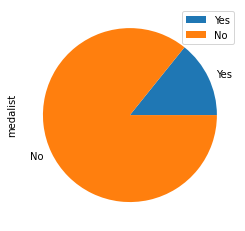

In [11]:
# Baseline
medalist = pd.DataFrame({'Yes':train.medalist.sum(),'No':(train.medalist == 0).sum()}, index = ['medalist']).T 
plot = medalist.plot.pie(y='medalist')

### Takeaway:
1. ***86 % of athletes do not medal***
2. 14 % of athletes medal

Baseline Established!

#### Question 1 & 2
1. Is being home (host nation) increase chances of medaling?
2. Does being on a team sport increase chances of medaling?

In [12]:
# Chi^2 based on categorical data
# Chi^2 test on categories
alpha=0.05
groups = ['isTeamSport','home','edition']
reject_null = []
medal_rate=[]
for group in groups:
    observed = pd.crosstab(train.medalist, train[group])
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    print(group)
#     print('Observed\n')
#     print(observed.values)
#     print('---\nExpected\n')
#     print(expected.astype(int))
#     print('---\n')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}\n')
    if p < alpha:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")
    medal_rate.append((train.medalist[train[group] == 1]).mean())
    reject_null.append(p<alpha)
    
results = pd.DataFrame(data = {'medal_rate':medal_rate,'reject_null':reject_null},index = groups)
results = results.sort_values(by= 'medal_rate')

isTeamSport
chi^2 = 9496.4912
p     = 0.0000

We reject the null hypothesis
home
chi^2 = 368.8961
p     = 0.0000

We reject the null hypothesis
edition
chi^2 = 201.2741
p     = 0.0000

We reject the null hypothesis


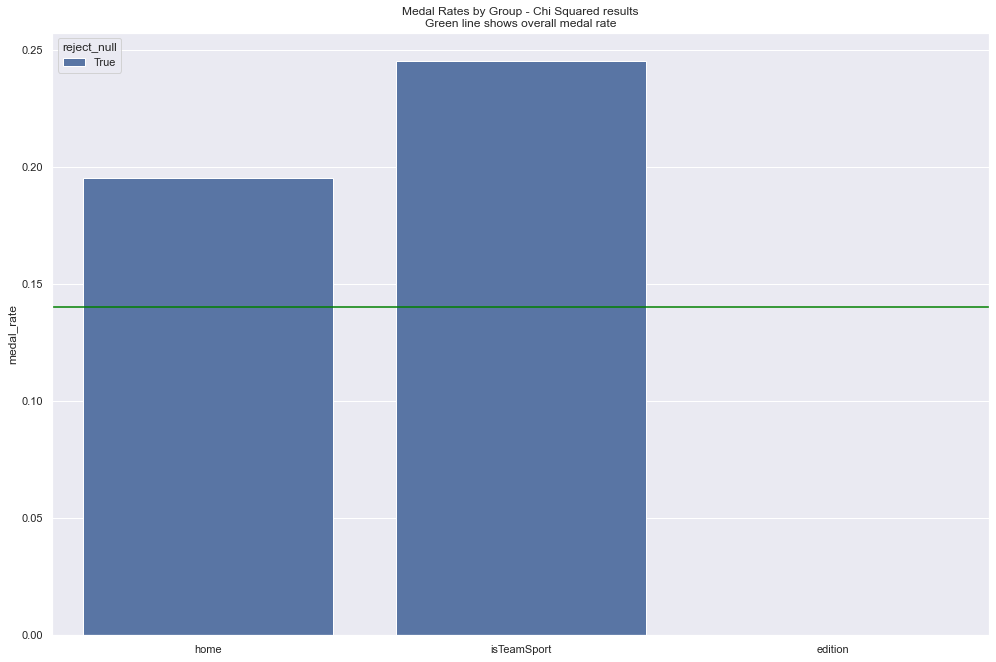

In [13]:
# Visual For Q1 & Q2; edition is used as validation of data.
baseline_medal =0.14
sns.set(rc={'figure.figsize':(14,9)})
sns.barplot(data = results, x = results.index ,y = 'medal_rate', hue = 'reject_null')
plt.tight_layout()
plt.title('Medal Rates by Group - Chi Squared results\nGreen line shows overall medal rate')
plt.axhline(y=baseline_medal, color = 'green')
# plt.bar_label(splot.containers[0])

#### Question 3
Does overall age impact medaling?


<function matplotlib.pyplot.show(close=None, block=None)>

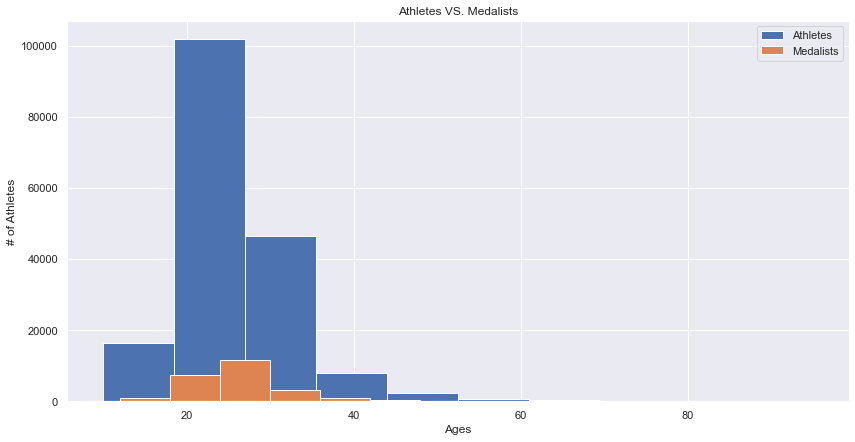

In [14]:
# Histogram showing athletes vs medalists.
train.age.hist()
plt.title('Age of medalists')
plt.xlabel('age')
plt.ylabel('# of Athletes')

medal_sample = train[train.medalist == 1].age
medal_sample.hist(figsize=(14,7))

plt.title('Athletes VS. Medalists')
plt.xlabel('Ages')
plt.ylabel('# of Athletes')
plt.legend(labels = ['Athletes', 'Medalists'])
plt.show

In [15]:
# Statistical testing to validate Age is key variable
alpha = 0.01
medal_sample = train[train.medalist == 1].age
overall_mean = train.age.mean()

t, p = stats.ttest_1samp(medal_sample, overall_mean)

print(t, p/2, alpha)

if p > alpha:
    print("We fail to reject H0")
elif t < 0:
    print("We fail to reject H0")
else:
    print("We reject H0")

8.655641438168386 2.595637330253769e-18 0.01
We reject H0


#### Question 4:
- Does bmi impact medaling?

<function matplotlib.pyplot.show(close=None, block=None)>

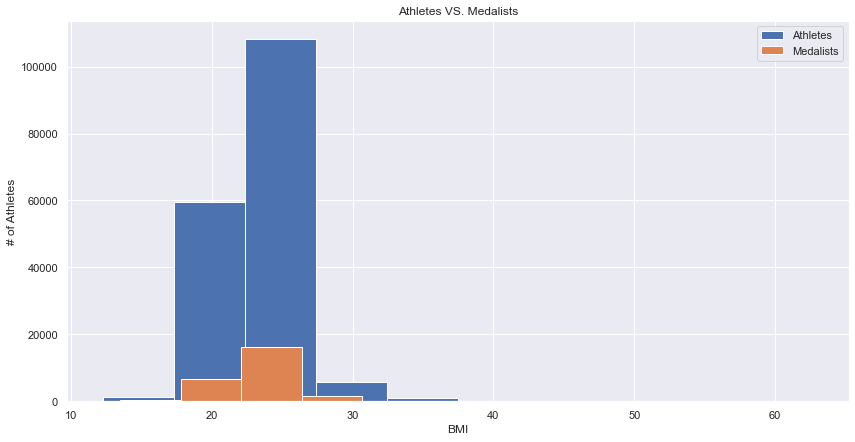

In [16]:
# Plot of BMI based on medalist
train.bmi.hist()
plt.title('BMI of medalists')
plt.xlabel('BMI')
plt.ylabel('# of Athletes')

medal_sample = train[train.medalist == 1].bmi
medal_sample.hist(figsize=(14,7))

plt.title('Athletes VS. Medalists')
plt.xlabel('BMI')
plt.ylabel('# of Athletes')
plt.legend(labels = ['Athletes', 'Medalists'])
plt.show

In [17]:
# Statistical testing
medal_sample = train[train.medalist == 1].bmi
overall_mean = train.bmi.mean()

t, p = stats.ttest_1samp(medal_sample, overall_mean)

print(t, p/2, alpha)
if p > alpha:
    print("We fail to reject H0")
elif t < 0:
    print("We fail to reject H0")
else:
    print("We reject H0")

15.320788671486348 4.820964864753437e-53 0.01
We reject H0


## EDA Takeaways:
Key Factors for  Feature selection:
1. Home (Athlete home country is host)
2. Team Sports 
3. Age
4. BMI


## Modeling

In [18]:
# Select Key features and Target
selected_features = ['home','isTeamSport','age','bmi']
target = 'medalist'

In [19]:
# Baseline built in
n = train.shape[0]
baseline_medal=1-train.medalist.sum()/n
baseline_medal

0.8578471464921846

In [20]:
# Hard Code data to train, validate, test models
X_train = train[selected_features]
y_train = train[[target]]

X_validate = validate[selected_features]
y_validate = validate[[target]]

X_test = test[selected_features]
y_test = test[[target]]

In [21]:
# Check Split
X_train[:3], y_train[:3]

(        home  isTeamSport                  age                  bmi
 98265      0            1                32.00                27.34
 177475     0            0                30.00                22.96
 89882      0            1                22.00                23.72,
         medalist
 98265          0
 177475         0
 89882          0)

### Random Forest & Decision tree

In [22]:
# Collect results for all models in a dataframe all_results
all_results = pd.DataFrame()

# Set range of tested hyperparameters
min_samples_range = range(1,10)
d_range = range(1,10)

# Iterates through both decision tree and random forest models. These models share the same hyperparameters
for model_name in ['decision_tree','random_forest']:
    # Define empty lists to record results
    depths =[]
    min_samples = []
    train_accuracies = []
    train_precisions = []
    train_recalls = []

    v_accuracies = []
    v_precisions = []
    v_recalls = []
    # Iterate through max depth values
    for d in d_range:
        # Iterate through min_samples_leaf values
        for min_sample in min_samples_range:
            if model_name == 'decision_tree':
                # Fit model on train data (decision tree)
                clf, train_report = modeling.decision_tree_train(X_train, 
                                                              y_train, 
                                                              selected_features,
                                                              target, 
                                                              d=d, 
                                                              m = min_sample, 
                                                              print_results=False)
            else:
                # Fit model on train data (random forest)
                clf, train_report = modeling.random_forest_train(X_train,
                                                              y_train,
                                                              selected_features,
                                                              target,
                                                              d=d,
                                                              m = min_sample,
                                                              print_results=False)
            # Test model on validate data    
            validate_report = modeling.classifier_validate(X_validate,y_validate, clf, print_results=False)
            
            # Compile results into dataframe
            depths.append(d)
            min_samples.append(min_sample)
            train_accuracies.append(train_report['accuracy'])
            train_precisions.append(train_report['precision'])
            train_recalls.append(train_report['recall'])

            v_accuracies.append(validate_report['accuracy'])
            v_precisions.append(validate_report['precision'])
            v_recalls.append(validate_report['recall'])
            
    train_results_df= pd.DataFrame(data = {"max_depth":depths,
                                           "min_samples_leaf":min_samples,
                                           "accuracy":train_accuracies,
                                           "precision":train_precisions,
                                           "recall":train_recalls})
    validate_results_df= pd.DataFrame(data = {"max_depth":depths,
                                              "min_samples_leaf":min_samples,
                                              "accuracy":v_accuracies,
                                              "precision":v_precisions,
                                              "recall":v_recalls})
    # Combine train and validate results as well as calculate difference in performance between train and validate
    combined_df2 = modeling.consolidate_results(train_results_df, 
                                            validate_results_df, 
                                            join_on = ['max_depth','min_samples_leaf'])
    combined_df2["algorithm"] = model_name
    # Concatenate results into one dataframe to hold results for all models
    all_results = pd.concat([all_results,combined_df2])

In [23]:
# Put into datafram for visual comparison 
train_results_df= pd.DataFrame(data = {"max_depth":depths,"min_samples_leaf":min_samples,"accuracy":train_accuracies,"precision":train_precisions,"recall":train_recalls})
validate_results_df= pd.DataFrame(data = {"max_depth":depths,"min_samples_leaf":min_samples,"accuracy":v_accuracies,"precision":v_precisions,"recall":v_recalls})

combined_df = train_results_df.merge(validate_results_df,on=['max_depth','min_samples_leaf'], suffixes=['_train','_validate'])
combined_df["accuracy_diff"] = combined_df.accuracy_validate-combined_df.accuracy_train
combined_df["precision_diff"] = combined_df.precision_validate-combined_df.precision_train
combined_df["recall_diff"] = combined_df.recall_validate-combined_df.recall_train

combined_df = combined_df.sort_values(by =['accuracy_validate','accuracy_diff'], ascending=False)
print(f"Highest accuracy score on train:\n {combined_df.accuracy_train.max()} with max depth setting of {combined_df.max_depth[combined_df.accuracy_train.idxmax()]} and min_sample_leaf of {combined_df.min_samples_leaf[combined_df.accuracy_train.idxmax()]}")
print(f"Highest accuracy score on validate:\n{combined_df.accuracy_validate.max()} with max depth setting of {combined_df.max_depth[combined_df.accuracy_validate.idxmax()]} and min_sample_leaf of {combined_df.min_samples_leaf[combined_df.accuracy_validate.idxmax()]}")
print(f"This was a drop-off from train of:\n{combined_df.accuracy_diff[combined_df.accuracy_validate == combined_df.accuracy_validate.max()].array[0]}")
print(f"Lowest drop-off in accuracy from train to validate:\n {combined_df.accuracy_diff.max()} with max depth setting of {combined_df.max_depth[combined_df.accuracy_diff == combined_df.accuracy_diff.max()].array[0]} and min sample leaf of  {combined_df.min_samples_leaf[combined_df.accuracy_diff == combined_df.accuracy_diff.max()].array[0]}")

random_forest_final_results = combined_df
random_forest_final_results["model"] = 'random_forest'

Highest accuracy score on train:
 0.8583015267175572 with max depth setting of 9 and min_sample_leaf of 2
Highest accuracy score on validate:
0.8606093536716275 with max depth setting of 9 and min_sample_leaf of 9
This was a drop-off from train of:
0.0024952587970364926
Lowest drop-off in accuracy from train to validate:
 0.002695944274742179 with max depth setting of 1 and min sample leaf of  1


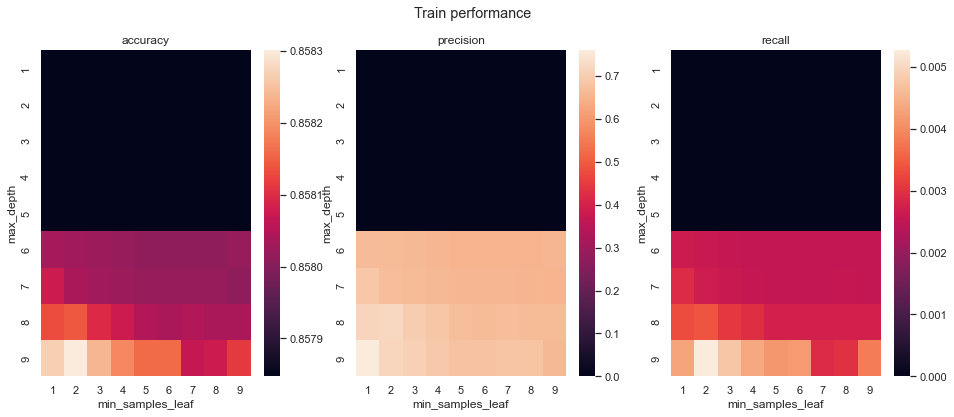

In [24]:
# Plot train accuracy, precision, and recall
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
    
for i, metric in enumerate(to_plot):
    heatmap_df = train_results_df.pivot("max_depth","min_samples_leaf",metric)
    # Set floor of accuracy at the baseline 
    if i == 0:
        sns.heatmap(heatmap_df, ax=ax[i], vmin = baseline_medal)
        ax[i].set_title(metric)
    else:
        sns.heatmap(heatmap_df, ax=ax[i])
        ax[i].set_title(metric)
    plt.suptitle('Train performance')

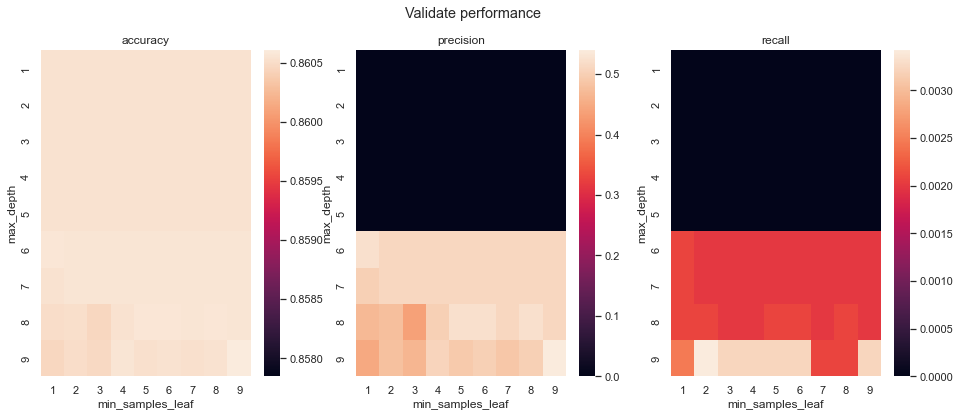

In [25]:
# Plot validate accuracy, performance, and recall
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
for i, metric in enumerate(to_plot):
    heatmap_df = validate_results_df.pivot("max_depth","min_samples_leaf",metric)
    # Set floor of accuracy at the baseline 
    if i == 0:
        sns.heatmap(heatmap_df, ax=ax[i], vmin = baseline_medal)
        ax[i].set_title(metric)
    else:
        sns.heatmap(heatmap_df, ax=ax[i])
        ax[i].set_title(metric)
    plt.suptitle('Validate performance')

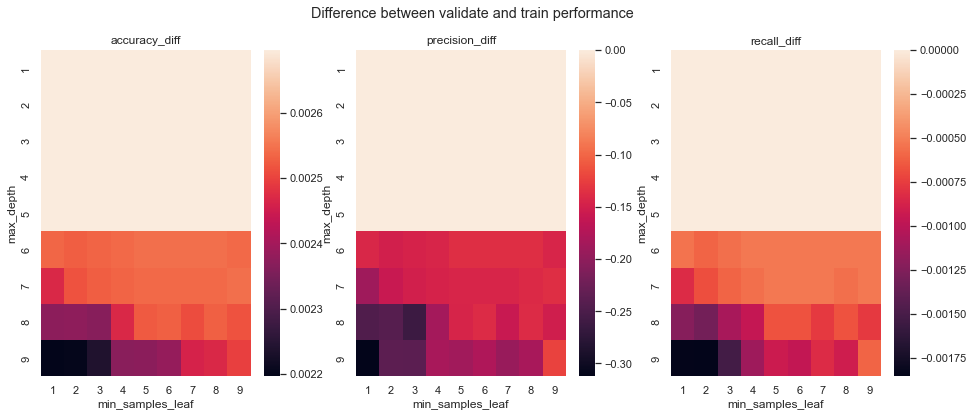

In [26]:
# Gauge difference between graphs
_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy_diff","precision_diff","recall_diff"]
for i, metric in enumerate(to_plot):
    heatmap_df = combined_df.pivot("max_depth","min_samples_leaf",metric)
    sns.heatmap(heatmap_df, ax=ax[i])
    plt.suptitle('Difference between validate and train performance')
    ax[i].set_title(metric)

### KNN

In [27]:
# KNN algorithm and report building
ks =[]
train_accuracies = []
train_precisions = []
train_recalls = []

v_accuracies = []
v_precisions = []
v_recalls = []

k_range = range(1,100)
for k in k_range:

    clf, train_report = modeling.knn_train(X_train, y_train, selected_features, target, k=k, print_results=False)
    validate_report = modeling.knn_validate(X_validate,y_validate, clf, print_results=False)

    ks.append(k)
    min_samples.append(min_sample)
    train_accuracies.append(train_report['accuracy'])
    train_precisions.append(train_report['precision'])
    train_recalls.append(train_report['recall'])

    v_accuracies.append(validate_report['accuracy'])
    v_precisions.append(validate_report['precision'])
    v_recalls.append(validate_report['recall'])

In [28]:
# Results put into dataframe for visuals
train_results_df= pd.DataFrame(data = {"k":ks,"accuracy":train_accuracies,"precision":train_precisions,"recall":train_recalls})
validate_results_df= pd.DataFrame(data = {"k":ks,"accuracy":v_accuracies,"precision":v_precisions,"recall":v_recalls})

combined_df = train_results_df.merge(validate_results_df,on=['k'], suffixes=['_train','_validate'])
combined_df["accuracy_diff"] = combined_df.accuracy_validate-combined_df.accuracy_train
combined_df["precision_diff"] = combined_df.precision_validate-combined_df.precision_train
combined_df["recall_diff"] = combined_df.recall_validate-combined_df.recall_train

# Combine train and validate results as well as calculate difference in performance between train and validate
combined_df2 = modeling.consolidate_results(train_results_df, validate_results_df, join_on = ['k'])
combined_df2["algorithm"] = "k_nearest_neighbors"
# Concatenate results into one dataframe to hold results for all models
all_results = pd.concat([all_results,combined_df2])

combined_df = combined_df.sort_values(by =['accuracy_validate','accuracy_diff'], ascending=False)
print(f"Highest accuracy score on train:\n {combined_df.accuracy_train.max()} with k setting of {combined_df.k[combined_df.accuracy_train.idxmax()]}")
print(f"Highest accuracy score on validate:\n {combined_df.accuracy_validate.max()} with k setting of {combined_df.k[combined_df.accuracy_validate.idxmax()]}")
print(f"Lowest drop-off in accuracy from train to validate:\n {combined_df.accuracy_diff.min()} with k setting of {combined_df.k[combined_df.accuracy_diff == combined_df.accuracy_diff.min()].array[0]}")

knn_final_results = combined_df
knn_final_results["model"] = 'k_nearest_neighbors'

Highest accuracy score on train:
 0.8650490730643402 with k setting of 2
Highest accuracy score on validate:
 0.8605961010906874 with k setting of 46
Lowest drop-off in accuracy from train to validate:
 -0.059505841792837355 with k setting of 1


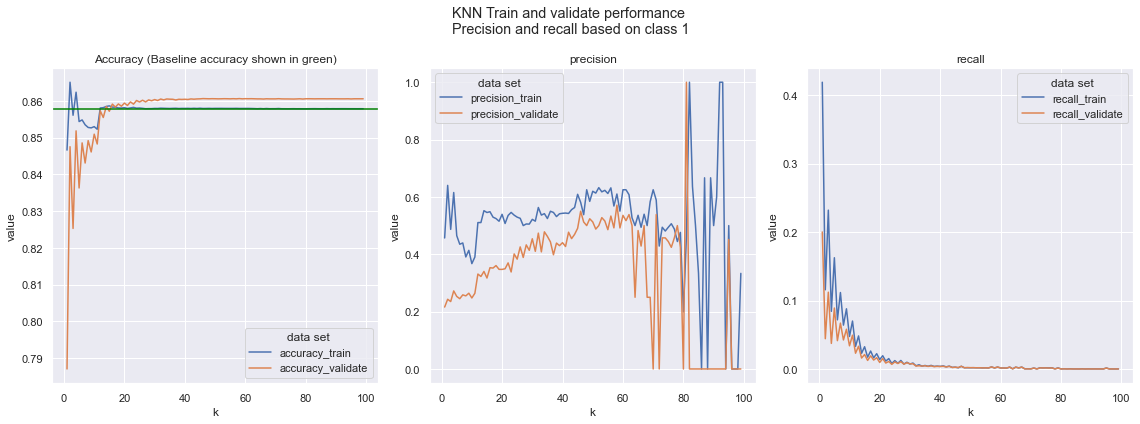

In [29]:
# Melt metrics into same column to enable clean plotting with seaborn
data = pd.melt(combined_df.drop(columns = ['accuracy_diff','precision_diff','recall_diff']), id_vars =['k'], var_name='metric')

_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
for i, metric in enumerate(to_plot):
    sns.lineplot(x = data[data.metric.str.contains(metric)].k, 
                 y = data[data.metric.str.contains(metric)].value, 
                 hue = data[data.metric.str.contains(metric)].metric,  
                 ax=ax[i])
    
    plt.suptitle(f'KNN Train and validate performance \nPrecision and recall based on class 1')
    plt.tight_layout()
    #plt.xticks([analysis_range])
    ax[i].legend(title = 'data set')
    ax[i].set_title(metric)
    if metric == "accuracy":
        ax[i].set_title('Accuracy (Baseline accuracy shown in green)')
        ax[i].axhline(baseline_medal, color = 'green')

### Logistical Regression

In [30]:
# Train algorithm and pull results
cs =[]
train_accuracies = []
train_precisions = []
train_recalls = []

v_accuracies = []
v_precisions = []
v_recalls = []

c_range = np.linspace(0.01, 10000, num = 50)#[0.01, 0.1, 1.0, 10, 100, 1000, 10000]
for c in c_range:

    clf, train_report = modeling.logistic_regression_train(X_train, y_train, selected_features, target, c=c, print_results=False)
    validate_report = modeling.logisitic_regression_validate(X_validate,y_validate, clf, print_results=False)

    cs.append(clf.C)
    min_samples.append(min_sample)
    train_accuracies.append(train_report['accuracy'])
    train_precisions.append(train_report['precision'])
    train_recalls.append(train_report['recall'])

    v_accuracies.append(validate_report['accuracy'])
    v_precisions.append(validate_report['precision'])
    v_recalls.append(validate_report['recall'])

In [31]:
# PUt results into dataframe for visuals
train_results_df= pd.DataFrame(data = {"c":cs,"accuracy":train_accuracies,"precision":train_precisions,"recall":train_recalls})
validate_results_df= pd.DataFrame(data = {"c":cs,"accuracy":v_accuracies,"precision":v_precisions,"recall":v_recalls})

combined_df = train_results_df.merge(validate_results_df,on=['c'], suffixes=['_train','_validate'])
combined_df["accuracy_diff"] = combined_df.accuracy_validate-combined_df.accuracy_train
combined_df["precision_diff"] = combined_df.precision_validate-combined_df.precision_train
combined_df["recall_diff"] = combined_df.recall_validate-combined_df.recall_train

combined_df2 = modeling.consolidate_results(train_results_df, validate_results_df, join_on = ['c'])
combined_df2["algorithm"] = "logistic_regression"
all_results = pd.concat([all_results,combined_df2])

combined_df2 = modeling.consolidate_results(train_results_df, validate_results_df, join_on = ['c'])
combined_df2["algorithm"] = "logistic_regression"
all_results = pd.concat([all_results,combined_df2])

combined_df = combined_df.sort_values(by =['accuracy_validate','accuracy_diff'], ascending=False)
print(f"Highest accuracy score on train:\n {combined_df.accuracy_train.max()} with c setting of {combined_df.c[combined_df.accuracy_train.idxmax()]}")
print(f"Highest accuracy score on validate:\n {combined_df.accuracy_validate.max()} with c setting of {combined_df.c[combined_df.accuracy_validate.idxmax()]}")
print(f"Lowest drop-off in accuracy from train to validate:\n {combined_df.accuracy_diff.min()} with c setting of {combined_df.c[combined_df.accuracy_diff == combined_df.accuracy_diff.min()].array[0]}")

logistic_regression_final_results = combined_df
logistic_regression_final_results["model"] = 'logistic_regression'

Highest accuracy score on train:
 0.8578471464921846 with c setting of 0.01
Highest accuracy score on validate:
 0.8605430907669268 with c setting of 0.01
Lowest drop-off in accuracy from train to validate:
 0.002695944274742179 with c setting of 0.01


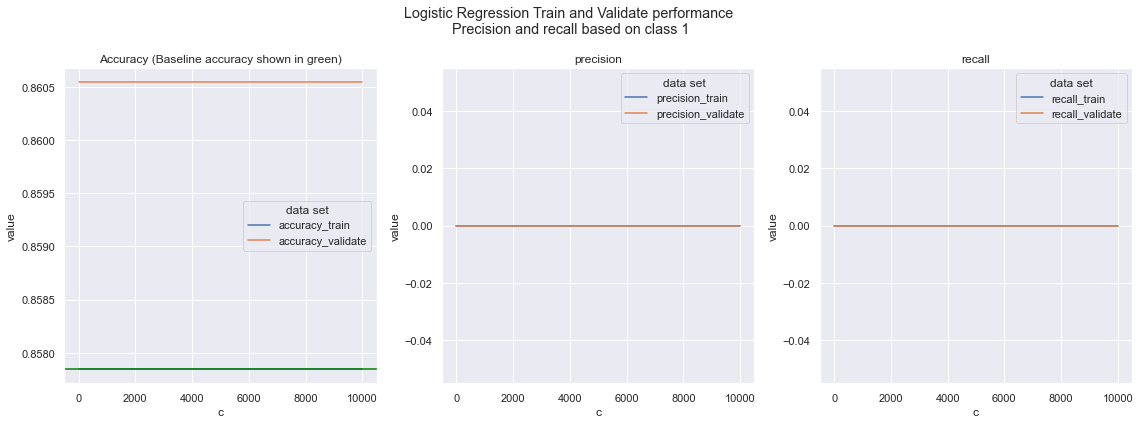

In [32]:
# Melt metrics into same column to enable clean plotting with seaborn
data = pd.melt(combined_df.drop(columns = ['accuracy_diff','precision_diff','recall_diff']), id_vars =['c'], var_name='metric')

_, ax = plt.subplots(1,3, figsize=(16,6))
to_plot = ["accuracy","precision","recall"]
for i, metric in enumerate(to_plot):
    sns.lineplot(x = data[data.metric.str.contains(metric)].c, 
                 y = data[data.metric.str.contains(metric)].value, 
                 hue = data[data.metric.str.contains(metric)].metric,  
                 ax=ax[i])
    
    plt.suptitle(f'Logistic Regression Train and Validate performance \nPrecision and recall based on class 1')
    plt.tight_layout()
    #plt.xticks([analysis_range])
    ax[i].legend(title = 'data set')
    ax[i].set_title(metric)
    if metric == "accuracy":
        ax[i].set_title('Accuracy (Baseline accuracy shown in green)')
        ax[i].axhline(baseline_medal, color = 'green')

In [34]:
# Data for comparison between algorithm models
final_results = pd.concat([random_forest_final_results,knn_final_results,logistic_regression_final_results])
final_results.sort_values(by='accuracy_validate', ascending=False)

,max_depth,min_samples_leaf,accuracy_train,precision_train,recall_train,accuracy_validate,precision_validate,recall_validate,accuracy_diff,precision_diff,recall_diff,model,k,c
80,9.00,9.00,0.86,0.66,0.00,0.86,0.54,0.00,0.00,-0.12,-0.00,random_forest,NaN,NaN
45,NaN,NaN,0.86,0.58,0.00,0.86,0.55,0.00,0.00,-0.03,0.00,k_nearest_neighbors,46.00,NaN
57,NaN,NaN,0.86,0.61,0.00,0.86,0.57,0.00,0.00,-0.04,0.00,k_nearest_neighbors,58.00,NaN
61,NaN,NaN,0.86,0.61,0.00,0.86,0.54,0.00,0.00,-0.07,0.00,k_nearest_neighbors,62.00,NaN
52,NaN,NaN,0.86,0.62,0.00,0.86,0.53,0.00,0.00,-0.09,0.00,k_nearest_neighbors,53.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,NaN,NaN,0.85,0.41,0.09,0.85,0.26,0.06,-0.01,-0.15,-0.03,k_nearest_neighbors,9.00,NaN
6,NaN,NaN,0.85,0.44,0.11,0.84,0.26,0.07,-0.01,-0.18,-0.04,k_nearest_neighbors,7.00,NaN
4,NaN,NaN,0.85,0.46,0.16,0.84,0.25,0.09,-0.02,-0.21,-0.07,k_nearest_neighbors,5.00,NaN
2,NaN,NaN,0.86,0.49,0.23,0.83,0.24,0.11,-0.03,-0.25,-0.12,k_nearest_neighbors,3.00,NaN


# Takeaway
#### Top 3 Models based on Accuracy
- Random Forest W/ depth of 9 and sample leaf of 9
- KNN with K at 58
- KNN with K at 46

Precision Difference Highest With KNN with K at 46.  *** Test Model ***

In [35]:
# Training KNN on Train Data
selected_features = ['home','isTeamSport','age','bmi']
clf, train_report = modeling.knn_train(X_train, y_train, selected_features, target, k=46, print_results=False)

In [36]:
# Pushing Test data
test_report = modeling.knn_validate(X_test,y_test, clf, print_results=False)

In [37]:
# Create dataframe of the test report
test_report = pd.DataFrame(data = [test_report])
# Append '_test' to each column in test
test_report.columns = [c+'_test' for c in test_report]
# Get row for selected k value
final_result = all_results[all_results.k == 46]
# Merge train, validate, and test results into one dataframe
final_result = pd.merge(final_result, test_report,left_on='k',right_on='k_test')

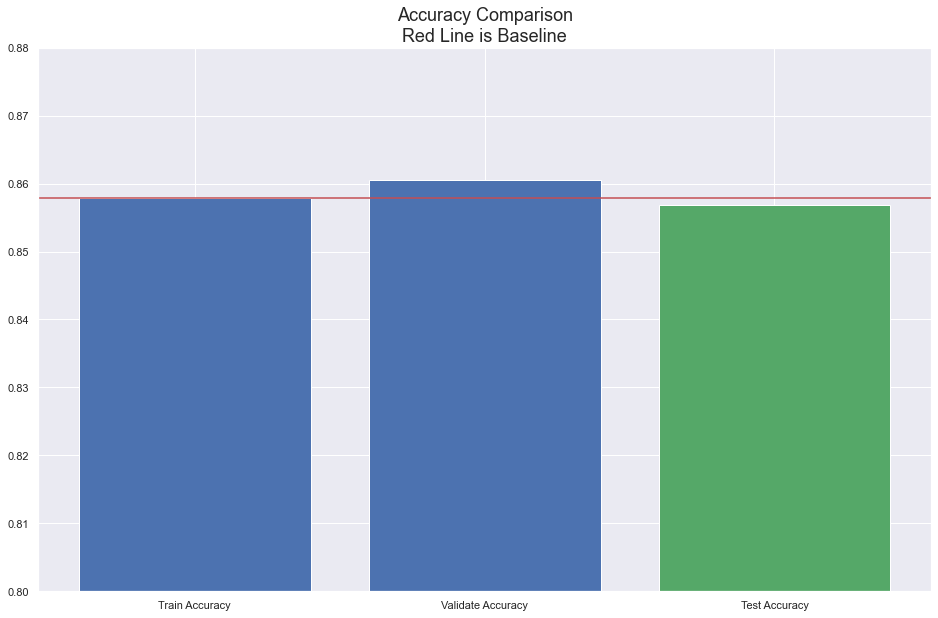

In [38]:
# Compare accuracy from different data sets
baseline_accuracy=baseline_medal
_, ax = plt.subplots(1,1, figsize=(16,10))
plt.bar(x=['Train Accuracy',
           'Validate Accuracy',
           'Test Accuracy'],
        height = [final_result.accuracy_train[0], final_result.accuracy_validate[0], final_result.accuracy_test[0]],
       color = ('b','b','g'))
plt.ylim(0.8,0.88)
plt.title('Accuracy Comparison\nRed Line is Baseline', fontsize=18)
plt.axhline(baseline_accuracy, color = 'r')

# Final Takeaway
1. Model met baseline, but did not beat it on test data.
2. Would be good to explore data on medalists vs non-medalists
3. Country data may be key indicator of factors (GDP, TOtal Population, etc)
